In [1]:
import pandas as pd

veri = pd.read_excel("TarihselVeriler.xlsx", sheet_name="Genel Bilgiler", engine="xlrd")
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61120 entries, 0 to 61119
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TARİH                   61120 non-null  datetime64[ns]
 1   FON KODU                61120 non-null  object        
 2   FON ADI                 61120 non-null  object        
 3   FİYAT                   61120 non-null  float64       
 4   TEDAVÜLDEKİ PAY SAYISI  61120 non-null  float64       
 5   KİŞİ SAYISI             61120 non-null  int64         
 6   FON TOPLAM DEĞER        61120 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 3.3+ MB


In [2]:
veri.sort_values(by="TARİH", inplace=True)

In [3]:
isbank_pp = veri[veri['FON ADI'].str.contains('^İŞ PORTFÖY PARA PİYASASI FONU')]
ykb_pp = veri[veri['FON ADI'].str.contains('^YAPI KREDİ PORTFÖY PARA PİYASASI FONU')]

In [4]:
keyword = 'PARA PİYASASI FONU$'
unique_ones = veri['FON ADI'][veri['FON ADI'].str.contains(keyword)].unique()

In [5]:
fund_list = []
for i in unique_ones:
    fund_list.append(veri[veri['FON ADI'].str.contains(i)])

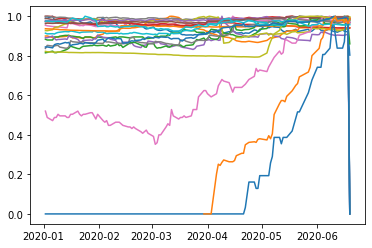

In [6]:
import matplotlib.pyplot as plt

for i in fund_list:
    plt.plot(i['TARİH'], i['KİŞİ SAYISI'] / i['KİŞİ SAYISI'].max(), )

In [7]:
veri[veri['FON ADI'].str.contains('PARA PİYASASI FONU')]

,TARİH,FON KODU,FON ADI,FİYAT,TEDAVÜLDEKİ PAY SAYISI,KİŞİ SAYISI,FON TOPLAM DEĞER
60799,2020-01-02,GAL,GARANTİ PORTFÖY İKİNCİ PARA PİYASASI FONU,65.661115,3.097250e+07,21494,2.033689e+09
60768,2020-01-02,FIL,FİBA PORTFÖY PARA PİYASASI FONU,0.055773,3.924043e+10,6380,2.188568e+09
60760,2020-01-02,EIL,QİNVEST PORTFÖY PARA PİYASASI FONU,0.811792,5.032050e+06,228,4.084980e+06
60853,2020-01-02,HSL,HSBC PORTFÖY PARA PİYASASI FONU,69.578275,1.794030e+07,21576,1.248255e+09
60875,2020-01-02,ICE,ICBC TURKEY PORTFOY PARA PİYASASI FONU,20.533691,1.225841e+07,4448,2.517104e+08
...,...,...,...,...,...,...,...
517,2020-06-19,VK6,ZİRAAT PORTFÖY VAKIFBANK PARA PİYASASI FONU,0.662378,4.136218e+09,1,2.739738e+09
286,2020-06-19,IGL,TEB PORTFÖY ING BANK PARA PİYASASI FONU,97.858671,8.282381e+06,13814,8.105028e+08
302,2020-06-19,IOP,İŞ PORTFÖY ODEABANK PARA PİYASASI FONU,1.015357,8.426420e+07,321,8.555823e+07
392,2020-06-19,OYL,OYAK PORTFÖY BİRİNCİ PARA PİYASASI FONU,0.028606,5.987585e+09,0,1.712792e+08


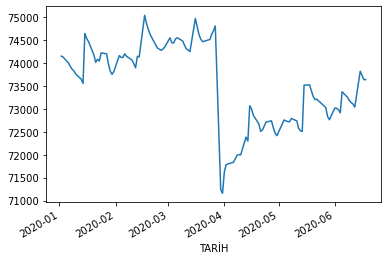

In [8]:
veri[veri['FON ADI'].str.contains('PARA PİYASASI FONU$')].groupby(['TARİH'])['KİŞİ SAYISI'].mean().iloc[:-1].plot()

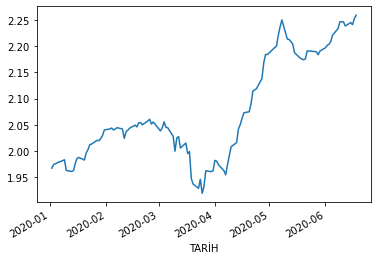

In [9]:
veri[veri['FON ADI'].str.contains('EUROBOND')].groupby(['TARİH'])['FİYAT'].mean().iloc[:-1].plot()

In [10]:
df = veri[veri['FON ADI'].str.contains('İŞ PORTFÖY PARA PİYASASI FONU')].copy()
df.set_index('TARİH', inplace=True)
df

,FON KODU,FON ADI,FİYAT,TEDAVÜLDEKİ PAY SAYISI,KİŞİ SAYISI,FON TOPLAM DEĞER
TARİH,,,,,,
2020-01-02,TI1,İŞ PORTFÖY PARA PİYASASI FONU,269.589430,25495887.0,96060,6.873422e+09
2020-01-03,TI1,İŞ PORTFÖY PARA PİYASASI FONU,269.660832,25317596.0,96131,6.827164e+09
2020-01-06,TI1,İŞ PORTFÖY PARA PİYASASI FONU,269.868321,25709802.0,96110,6.938261e+09
2020-01-07,TI1,İŞ PORTFÖY PARA PİYASASI FONU,269.939573,26242166.0,96086,7.083799e+09
2020-01-08,TI1,İŞ PORTFÖY PARA PİYASASI FONU,270.017232,25987760.0,95892,7.017143e+09
...,...,...,...,...,...,...
2020-06-15,TI1,İŞ PORTFÖY PARA PİYASASI FONU,279.616128,27901092.0,97783,7.801595e+09
2020-06-16,TI1,İŞ PORTFÖY PARA PİYASASI FONU,279.663248,28061050.0,97699,7.847644e+09
2020-06-17,TI1,İŞ PORTFÖY PARA PİYASASI FONU,279.711553,28074163.0,97563,7.852668e+09


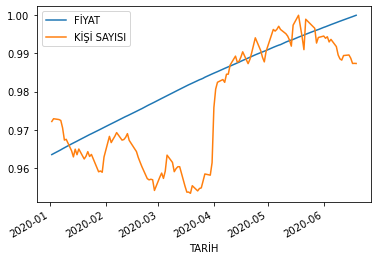

In [11]:
(df.loc[:, ['FİYAT', 'KİŞİ SAYISI']] / df.loc[:, ['FİYAT', 'KİŞİ SAYISI']].max()).plot()

In [12]:
df2 = veri[veri['FON ADI'].str.contains('^İŞ PORTFÖY')].set_index(['TARİH', 'FON ADI']).unstack()
df2.head()

FON KODU  \
FON ADI    İŞ PORTFÖY 3K SERBEST (DÖVİZ) ÖZEL FON   
TARİH                                               
2020-01-02                                    NaN   
2020-01-03                                    NaN   
2020-01-06                                    NaN   
2020-01-07                                    NaN   
2020-01-08                                    NaN   

                                                                          \
FON ADI    İŞ PORTFÖY AAF SERBEST (DÖVİZ) ÖZEL FON İŞ PORTFÖY ALTIN FONU   
TARİH                                                                      
2020-01-02                                     NaN                   TTA   
2020-01-03                                     NaN                   TTA   
2020-01-06                                     NaN                   TTA   
2020-01-07                                     NaN                   TTA   
2020-01-08                                     NaN                   TTA   

                                                                \
FON ADI    İŞ PORTFÖY ANADOLU HAYAT EMEKLİLİK SERBEST ÖZEL FON   
TARİH                                                            
2020-01-02                                                IMH    
2020-01-03                                                IMH    
2020-01-06                                                IMH    
2020-01-07                                                IMH    
2020-01-08                                                IMH    

                                                        \
FON ADI    İŞ PORTFÖY ANADOLU SİGORTA SERBEST ÖZEL FON   
TARİH                                                    
2020-01-02                                         IPE   
2020-01-03                                         IPE   
2020-01-06                                         IPE   
2020-01-07                                         IPE   
2020-01-08                                         IPE   

                                                        \
FON ADI    İŞ PORTFÖY ARCADİA SERBEST (DÖVİZ) ÖZEL FON   
TARİH                                                    
2020-01-02                                         ICG   
2020-01-03                                         ICG   
2020-01-06                                         ICG   
2020-01-07                                         ICG   
2020-01-08                                         ICG   

                                           \
FON ADI    İŞ PORTFÖY AS SERBEST ÖZEL FON   
TARİH                                       
2020-01-02                            IPU   
2020-01-03                            IPU   
2020-01-06                            IPU   
2020-01-07                            IPU   
2020-01-08                            IPU   

                                                     \
FON ADI    İŞ PORTFÖY ASSG SERBEST (DÖVİZ) ÖZEL FON   
TARİH                                                 
2020-01-02                                      NaN   
2020-01-03                                      NaN   
2020-01-06                                      NaN   
2020-01-07                                      NaN   
2020-01-08                                      NaN   

                                              \
FON ADI    İŞ PORTFÖY ASİST SERBEST ÖZEL FON   
TARİH                                          
2020-01-02                               NaN   
2020-01-03                               NaN   
2020-01-06                               NaN   
2020-01-07                               NaN   
2020-01-08                               NaN   

                                                        ...  \
FON ADI    İŞ PORTFÖY AYAYDIN SERBEST (DÖVİZ) ÖZEL FON  ...   
TARİH                                                   ...   
2020-01-02                                         NaN  ...   
2020-01-03                                         NaN  ...   
2020-01-06                                    

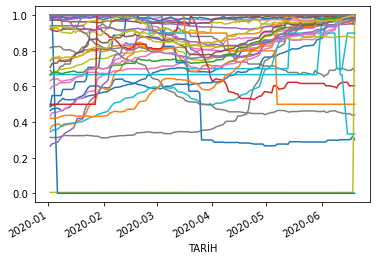

In [13]:
(df2.loc[:, 'KİŞİ SAYISI'] / df2.loc[:, 'KİŞİ SAYISI'].max()).dropna(axis=1).plot(legend=False)

In [14]:
df2.loc['2020-01', 'KİŞİ SAYISI'].columns.str.contains('PARA PİYASASI FONU$')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [15]:
df3 = veri.set_index(['TARİH', 'FON ADI']).unstack()
df3.head()

FON KODU  \
FON ADI    ACTUS PORTFÖY 2020 YATIRIM DÖNEMLİ DEĞİŞKEN FON   
TARİH                                                        
2020-01-02                                             ACY   
2020-01-03                                             ACY   
2020-01-06                                             ACY   
2020-01-07                                             ACY   
2020-01-08                                             ACY   

                                                  \
FON ADI    ACTUS PORTFÖY BORÇLANMA ARAÇLARI FONU   
TARİH                                              
2020-01-02                                   ACO   
2020-01-03                                   ACO   
2020-01-06                                   ACO   
2020-01-07                                   ACO   
2020-01-08                                   ACO   

                                                                     \
FON ADI    ACTUS PORTFÖY HİSSE SENEDİ FONU (HİSSE SENEDİ YOĞUN FON)   
TARİH                                                                 
2020-01-02                                                ACC         
2020-01-03                                                ACC         
2020-01-06                                                ACC         
2020-01-07                                                ACC         
2020-01-08                                                ACC         

                                            \
FON ADI    ACTUS PORTFÖY HİTİT SERBEST FON   
TARİH                                        
2020-01-02                             ACZ   
2020-01-03                             ACZ   
2020-01-06                             ACZ   
2020-01-07                             ACZ   
2020-01-08                             ACZ   

                                                    \
FON ADI    ACTUS PORTFÖY LİDYA SERBEST (DÖVİZ) FON   
TARİH                                                
2020-01-02                                     ACN   
2020-01-03                                     ACN   
2020-01-06                                     ACN   
2020-01-07                                     ACN   
2020-01-08                                     ACN   

                                                     \
FON ADI    ACTUS PORTFÖY URARTU SERBEST (DÖVİZ) FON   
TARİH                                                 
2020-01-02                                      ACU   
2020-01-03                                      ACU   
2020-01-06                                      ACU   
2020-01-07                                      ACU   
2020-01-08                                      ACU   

                                                          \
FON ADI    AK PORTFÖY  AMERİKA YABANCI HİSSE SENEDİ FONU   
TARİH                                                      
2020-01-02                                           AFA   
2020-01-03                                           AFA   
2020-01-06                                           AFA   
2020-01-07                                           AFA   
2020-01-08                                           AFA   

                                                         \
FON ADI    AK PORTFÖY  AVRUPA YABANCI HİSSE SENEDİ FONU   
TARİH                                                     
2020-01-02                                          AFV   
2020-01-03                                          AFV   
2020-01-06                                          AFV   
2020-01-07                                          AFV   
2020-01-08                                          AFV   

                                                                              \
FON ADI    AK PORTFÖY AGI DEĞİŞKEN FON AK PORTFÖY AK SANDIK SERBEST ÖZEL FON   
TARİH                                                                          
2020-01-02                         AGC                                   SSO   
2020-01-03                         AGC            

In [16]:
pp_kisiler = df3.loc[:, 'KİŞİ SAYISI'].loc[:, df3.loc[:, 'KİŞİ SAYISI'].columns.str.contains('PARA PİYASASI FONU$')]
pp_kisiler = pp_kisiler.iloc[:-1]

In [17]:
pp_kisiler.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2020-01-02 to 2020-06-18
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   AK PORTFÖY ALTERNATİF BANK PARA PİYASASI FONU  116 non-null    float64
 1   AK PORTFÖY ÜÇÜNCÜ PARA PİYASASI FONU           116 non-null    float64
 2   ATA PORTFÖY PARA PİYASASI FONU                 116 non-null    float64
 3   DENİZ PORTFÖY PARA PİYASASI FONU               116 non-null    float64
 4   FİBA PORTFÖY PARA PİYASASI FONU                116 non-null    float64
 5   FİBA PORTFÖY ŞEKERBANK PARA PİYASASI FONU      116 non-null    float64
 6   GARANTİ PORTFÖY BİRİNCİ PARA PİYASASI FONU     116 non-null    float64
 7   GARANTİ PORTFÖY İKİNCİ PARA PİYASASI FONU      116 non-null    float64
 8   GLOBAL MD PORTFÖY PARA PİYASASI FONU           116 non-null    float64
 9   HSBC PORTFÖY PARA PİYASASI FONU    

In [18]:
pp_kisiler.dropna(axis=1, inplace=True)
pp_kisiler.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2020-01-02 to 2020-06-18
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   AK PORTFÖY ALTERNATİF BANK PARA PİYASASI FONU  116 non-null    float64
 1   AK PORTFÖY ÜÇÜNCÜ PARA PİYASASI FONU           116 non-null    float64
 2   ATA PORTFÖY PARA PİYASASI FONU                 116 non-null    float64
 3   DENİZ PORTFÖY PARA PİYASASI FONU               116 non-null    float64
 4   FİBA PORTFÖY PARA PİYASASI FONU                116 non-null    float64
 5   FİBA PORTFÖY ŞEKERBANK PARA PİYASASI FONU      116 non-null    float64
 6   GARANTİ PORTFÖY BİRİNCİ PARA PİYASASI FONU     116 non-null    float64
 7   GARANTİ PORTFÖY İKİNCİ PARA PİYASASI FONU      116 non-null    float64
 8   GLOBAL MD PORTFÖY PARA PİYASASI FONU           116 non-null    float64
 9   HSBC PORTFÖY PARA PİYASASI FONU    

In [19]:
pp_kisiler.head()

FON ADI,AK PORTFÖY ALTERNATİF BANK PARA PİYASASI FONU,AK PORTFÖY ÜÇÜNCÜ PARA PİYASASI FONU,ATA PORTFÖY PARA PİYASASI FONU,DENİZ PORTFÖY PARA PİYASASI FONU,FİBA PORTFÖY PARA PİYASASI FONU,FİBA PORTFÖY ŞEKERBANK PARA PİYASASI FONU,GARANTİ PORTFÖY BİRİNCİ PARA PİYASASI FONU,GARANTİ PORTFÖY İKİNCİ PARA PİYASASI FONU,GLOBAL MD PORTFÖY PARA PİYASASI FONU,HSBC PORTFÖY PARA PİYASASI FONU,...,OYAK PORTFÖY BİRİNCİ PARA PİYASASI FONU,QİNVEST PORTFÖY PARA PİYASASI FONU,TEB PORTFÖY ING BANK PARA PİYASASI FONU,TEB PORTFÖY PARA PİYASASI FONU,YAPI KREDİ PORTFÖY PARA PİYASASI FONU,ZİRAAT PORTFÖY HALKBANK PARA PİYASASI FONU,ZİRAAT PORTFÖY PARA PİYASASI FONU,ZİRAAT PORTFÖY VAKIFBANK PARA PİYASASI FONU,ÜNLÜ PORTFÖY PARA PİYASASI FONU,İŞ PORTFÖY PARA PİYASASI FONU
TARİH,,,,,,,,,,,,,,,,,,,,,
2020-01-02,3364.0,0.0,3046.0,205957.0,6380.0,7863.0,47150.0,21494.0,2411.0,21576.0,...,2530.0,228.0,11388.0,11656.0,253202.0,714939.0,66444.0,76914.0,65.0,96060.0
2020-01-03,3365.0,0.0,3044.0,205825.0,6383.0,7881.0,47150.0,21476.0,2402.0,21584.0,...,2531.0,227.0,11360.0,11683.0,253144.0,713026.0,66604.0,78317.0,61.0,96131.0
2020-01-06,3352.0,0.0,3060.0,205609.0,6328.0,7853.0,46912.0,21691.0,2404.0,21558.0,...,2517.0,227.0,11340.0,11776.0,253825.0,710337.0,66521.0,77995.0,59.0,96110.0
2020-01-07,3345.0,0.0,3098.0,205501.0,6322.0,7866.0,46941.0,21298.0,2400.0,21485.0,...,2565.0,231.0,11330.0,11667.0,253136.0,709936.0,66561.0,78051.0,61.0,96086.0
2020-01-08,3343.0,0.0,3102.0,205399.0,6337.0,7860.0,46913.0,21036.0,2413.0,21424.0,...,2575.0,231.0,11337.0,11664.0,252973.0,709271.0,66603.0,78265.0,61.0,95892.0


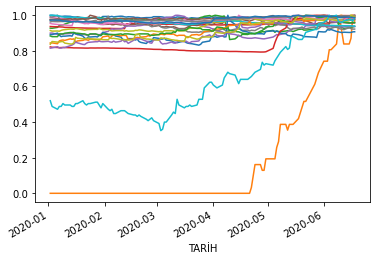

In [20]:
(pp_kisiler / pp_kisiler.max()).plot(legend=0)

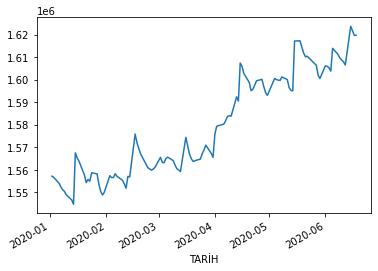

In [22]:
pp_kisiler.sum(axis=1).plot()
